# Exploración de los datos ataques del 2000 - 2017

In [1]:
# RCM3
import pandas as pd
import matplotlib
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
data_set = pd.read_csv('../../data/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1',usecols=[0, 1, 2, 3, 8, 9,10,11, 13, 14, 35, 84, 100, 103])

In [30]:
data_set.head()

,eventid,iyear,imonth,iday,country_txt,region,region_txt,provstate,latitude,longitude,targtype1_txt,weapsubtype1_txt,nkillter,nwoundte
0,197000000001,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,18.456792,-69.951164,Private Citizens & Property,NaN,NaN,NaN
1,197000000002,1970,0,0,Mexico,1,North America,NaN,19.432608,-99.133207,Government (Diplomatic),NaN,NaN,NaN
2,197001000001,1970,1,0,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,Journalists & Media,NaN,NaN,NaN
3,197001000002,1970,1,0,Greece,8,Western Europe,Attica,37.983773,23.728157,Government (Diplomatic),Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,0,Japan,4,East Asia,NaN,33.580412,130.396361,Government (Diplomatic),NaN,NaN,NaN


Renombramos las columanas para un mejor uso

In [31]:
data_set = data_set.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weapsubtype1_txt':'weapon', 'nkillter':'fatalities', 'nwoundte':'injuries'})

Observamos que la columnas se renombraron correctamente

In [32]:
data_set.columns

Index(['id', 'year', 'month', 'day', 'country', 'region', 'region_txt',
       'state', 'latitude', 'longitude', 'target', 'weapon', 'fatalities',
       'injuries'],
      dtype='object')

In [33]:
data_set.head()

,id,year,month,day,country,region,region_txt,state,latitude,longitude,target,weapon,fatalities,injuries
0,197000000001,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,18.456792,-69.951164,Private Citizens & Property,NaN,NaN,NaN
1,197000000002,1970,0,0,Mexico,1,North America,NaN,19.432608,-99.133207,Government (Diplomatic),NaN,NaN,NaN
2,197001000001,1970,1,0,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,Journalists & Media,NaN,NaN,NaN
3,197001000002,1970,1,0,Greece,8,Western Europe,Attica,37.983773,23.728157,Government (Diplomatic),Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,0,Japan,4,East Asia,NaN,33.580412,130.396361,Government (Diplomatic),NaN,NaN,NaN


Los datos NaN los hacemos 0

In [34]:
data_set['fatalities'] = data_set['fatalities'].fillna(0).astype(int)
data_set['injuries'] = data_set['injuries'].fillna(0).astype(int)

In [35]:
data = data_set

Numéro de registros

In [36]:
data.shape

(170350, 14)

Limpiamos los datos

In [37]:
data['month'][data.month == 0] = 1
data['day'][data.day == 0] = 1

In [38]:
data[data.year == 1]

,id,year,month,day,country,region,region_txt,state,latitude,longitude,target,weapon,fatalities,injuries


In [39]:
#data = data.drop([1,4336,4337,5652,5653,7179,15087])

In [40]:
data['date'] = pd.to_datetime(data[['day', 'month', 'year']])

In [41]:
data['date']

0        1970-07-02
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
5        1970-01-01
6        1970-01-02
7        1970-01-02
8        1970-01-02
9        1970-01-03
10       1970-01-01
11       1970-01-06
12       1970-01-08
13       1970-01-09
14       1970-01-09
15       1970-01-10
16       1970-01-11
17       1970-01-12
18       1970-01-12
19       1970-01-13
20       1970-01-14
21       1970-01-15
22       1970-01-19
23       1970-01-19
24       1970-01-19
25       1970-01-20
26       1970-01-21
27       1970-01-22
28       1970-01-22
29       1970-01-25
            ...    
170320   2016-12-31
170321   2016-12-31
170322   2016-12-30
170323   2016-12-31
170324   2016-12-31
170325   2016-12-31
170326   2016-12-31
170327   2016-12-31
170328   2016-12-31
170329   2016-12-31
170330   2016-12-31
170331   2016-12-31
170332   2016-12-31
170333   2016-12-31
170334   2016-12-31
170335   2016-12-31
170336   2016-12-31
170337   2016-12-31
170338   2016-12-31


In [42]:
data.columns

Index(['id', 'year', 'month', 'day', 'country', 'region', 'region_txt',
       'state', 'latitude', 'longitude', 'target', 'weapon', 'fatalities',
       'injuries', 'date'],
      dtype='object')

In [43]:
data = data[['id', 'date', 'year', 'state', 'latitude', 'longitude','region', 'region_txt','target', 'weapon', 'fatalities', 'injuries']]

In [44]:
data

,id,date,year,state,latitude,longitude,region,region_txt,target,weapon,fatalities,injuries
0,197000000001,1970-07-02,1970,NaN,18.456792,-69.951164,2,Central America & Caribbean,Private Citizens & Property,NaN,0,0
1,197000000002,1970-01-01,1970,NaN,19.432608,-99.133207,1,North America,Government (Diplomatic),NaN,0,0
2,197001000001,1970-01-01,1970,Tarlac,15.478598,120.599741,5,Southeast Asia,Journalists & Media,NaN,0,0
3,197001000002,1970-01-01,1970,Attica,37.983773,23.728157,8,Western Europe,Government (Diplomatic),Unknown Explosive Type,0,0
4,197001000003,1970-01-01,1970,NaN,33.580412,130.396361,4,East Asia,Government (Diplomatic),NaN,0,0
5,197001010002,1970-01-01,1970,Illinois,37.005105,-89.176269,1,North America,Police,Unknown Gun Type,0,0
6,197001020001,1970-01-02,1970,Montevideo,-34.891151,-56.187214,3,South America,Police,Automatic Weapon,0,0
7,197001020002,1970-01-02,1970,California,37.805065,-122.273024,1,North America,Utilities,Unknown Explosive Type,0,0
8,197001020003,1970-01-02,1970,Wisconsin,43.076592,-89.412488,1,North America,Military,Molotov Cocktail/Petrol Bomb,0,0
9,197001030001,1970-01-03,1970,Wisconsin,43.072950,-89.386694,1,North America,Government (General),Gasoline or Alcohol,0,0


In [45]:
data = data.sort_values(['fatalities', 'injuries'], ascending = False)
data = data.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])

In [46]:
data['text'] = data['date'].dt.strftime('%B %-d, %Y') + '<br>' +\
                     data['fatalities'].astype(str) + ' Killed, ' +\
                     data['injuries'].astype(str) + ' Injured'

In [47]:
from mpl_toolkits.basemap import Basemap
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='roycasianom', api_key='VGcmAsq1GkBlJM6uwAb9')

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [49]:
regions = list(set(data.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',
          'aqua', 'lightpink', 'blue', 'lightgray', 'navy']

In [50]:
data_map = data[data.year >= 2000]

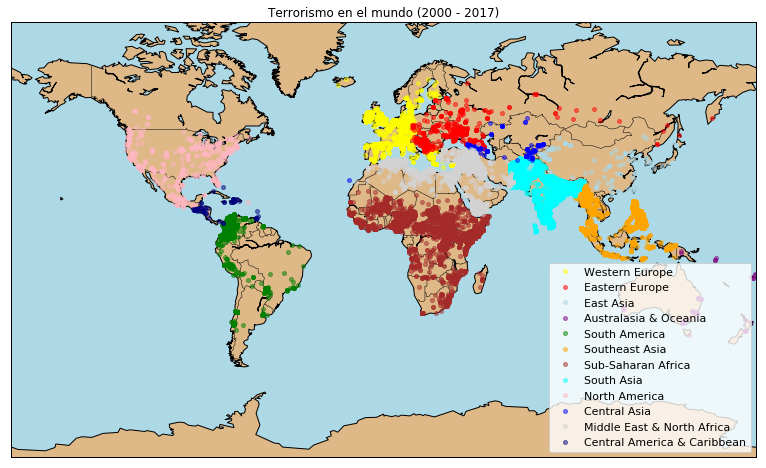

In [51]:
fig = plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(data_map.longitude[data_map.region_txt == region].astype("float")),
             (list(data_map.latitude[data_map.region_txt == region].astype("float"))))
    #print(y)
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return points

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)    

plt.title("Terrorismo en el mundo (2000 - 2017)")
plt.legend(loc ='lower right', prop= {'size':11})
plt.show()

In [2]:
data_set = pd.read_csv('../../data/globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

In [4]:
data_set = data_set[data_set.iyear >= 2000]

In [7]:
data_set.to_csv()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
